In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cv2
import PIL
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,MaxPooling2D,Dropout
from tensorflow.keras.utils import to_categorical,get_file

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
# cache_dir, verilerin nereden indirileceğini gösterir. Geçerli dizin anlamına geldiğini belirttim.
# untar true onu açacaktır.

data_dir = get_file("flower_photos", origin = dataset_url, cache_dir=".",untar=True)

In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib

In [7]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [8]:
list(data_dir.glob("*/*.jpg"))[:5]

[PosixPath('datasets/flower_photos/dandelion/1241011700_261ae180ca.jpg'),
 PosixPath('datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/16716172029_2166d8717f_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14306875733_61d71c64c0_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4164845062_1fd9b3f3b4.jpg')]

In [9]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [10]:
roses = list(data_dir.glob("roses/*.jpg"))
roses[:5]

[PosixPath('datasets/flower_photos/roses/1813435848_7852708394_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5492988531_574cdc2bf0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2448812029_047d981092_m.jpg'),
 PosixPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 PosixPath('datasets/flower_photos/roses/2423565102_2f1a00bb1b_n.jpg')]

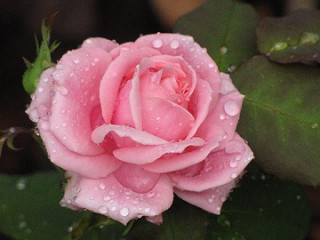

In [11]:
PIL.Image.open(str(roses[1]))

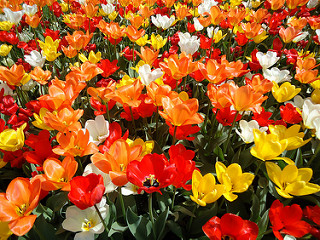

In [12]:
tulips = list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulips[0]))

# Read flowers images from disk into numpy array using opencv

In [13]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
classes = ["roses","daisy","dandelion","sunflowers","tulips"]

In [16]:
flowers_images_dict["roses"][:5]

[PosixPath('datasets/flower_photos/roses/1813435848_7852708394_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5492988531_574cdc2bf0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2448812029_047d981092_m.jpg'),
 PosixPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 PosixPath('datasets/flower_photos/roses/2423565102_2f1a00bb1b_n.jpg')]

In [17]:
# Dikkat !!

flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/1813435848_7852708394_n.jpg')

In [18]:
# Önemli !!

str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/1813435848_7852708394_n.jpg'

In [19]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(244, 320, 3)

In [20]:
# Her resmin boyutu bir değil biz bunu aşağıda da hepsi için aynı yapacağız !!!!

cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [21]:
flowers_images_dict.items()

dict_items([('roses', [PosixPath('datasets/flower_photos/roses/1813435848_7852708394_n.jpg'), PosixPath('datasets/flower_photos/roses/5492988531_574cdc2bf0_n.jpg'), PosixPath('datasets/flower_photos/roses/2448812029_047d981092_m.jpg'), PosixPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'), PosixPath('datasets/flower_photos/roses/2423565102_2f1a00bb1b_n.jpg'), PosixPath('datasets/flower_photos/roses/14880561916_79aeb812fd_n.jpg'), PosixPath('datasets/flower_photos/roses/14176042519_5792b37555.jpg'), PosixPath('datasets/flower_photos/roses/3667366832_7a8017c528_n.jpg'), PosixPath('datasets/flower_photos/roses/7147367479_f7a6ef0798.jpg'), PosixPath('datasets/flower_photos/roses/4061451210_1650590c6a.jpg'), PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'), PosixPath('datasets/flower_photos/roses/4675532860_890504a4a3_m.jpg'), PosixPath('datasets/flower_photos/roses/2535495431_e6f950443c.jpg'), PosixPath('datasets/flower_photos/roses/4724951744_61877ec10

In [22]:
# En Önemli Kısım !!!!

X, y = [], []

for flower_name, images in flowers_images_dict.items():

    for image in  images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [23]:
X = np.array(X)
y = np.array(y)

print("X Shape : {}".format(X.shape))
print("Y Shape : {}".format(y.shape))

X Shape : (3670, 180, 180, 3)
Y Shape : (3670,)


# Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [25]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Model

In [26]:
num_classes = len(flowers_labels_dict)
num_classes

5

In [27]:
cnn = Sequential()

cnn.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "same", activation = "relu"))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "same", activation = "relu"))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Flatten())
cnn.add(Dense(128, activation = "relu"))
cnn.add(Dense(num_classes))

cnn.compile(optimizer = "adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ["accuracy"])

cnn_history = cnn.fit(X_train_scaled, y_train, epochs= 10, validation_data = (X_test_scaled, y_test))

Epoch 1/10
86/86 [==============================] - 79s 917ms/step - loss: 1.3437 - accuracy: 0.4281 - val_loss: 1.1522 - val_accuracy: 0.5588
Epoch 2/10
86/86 [==============================] - 78s 913ms/step - loss: 0.9843 - accuracy: 0.6126 - val_loss: 1.0387 - val_accuracy: 0.5991
Epoch 3/10
86/86 [==============================] - 79s 914ms/step - loss: 0.8094 - accuracy: 0.6948 - val_loss: 1.0090 - val_accuracy: 0.6231
Epoch 4/10
86/86 [==============================] - 79s 917ms/step - loss: 0.6337 - accuracy: 0.7667 - val_loss: 0.9825 - val_accuracy: 0.6362
Epoch 5/10
86/86 [==============================] - 79s 920ms/step - loss: 0.4442 - accuracy: 0.8376 - val_loss: 1.0839 - val_accuracy: 0.6405
Epoch 6/10
86/86 [==============================] - 79s 917ms/step - loss: 0.2544 - accuracy: 0.9157 - val_loss: 1.3064 - val_accuracy: 0.6427
Epoch 7/10
86/86 [==============================] - 79s 920ms/step - loss: 0.1319 - accuracy: 0.9629 - val_loss: 1.5796 - val_accuracy: 0.6340

In [29]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0

In [30]:
# Düşük Çıkması Normal epochs = 10 Seçtik Artırırsak daha iyi olur !!!

cnn.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 7s 238ms/step - loss: 2.1047 - accuracy: 0.6438


[2.1046597957611084, 0.6437908411026001]

In [31]:
predictions = cnn.predict(X_test_scaled)
predictions

array([[  3.1001773,  17.573174 ,  -3.419951 , -15.384687 ,   7.616421 ],
       [ 12.337189 ,  -8.819304 , -11.9348345,  -3.400101 ,  13.068765 ],
       [ -1.6421521,   3.9220111,   9.818162 ,  -2.169718 ,  -4.9683065],
       ...,
       [-10.695608 ,   4.6309543,   6.371786 ,   8.531933 ,   5.7120013],
       [  5.629551 ,  -6.841523 ,  -3.129364 ,  -2.4431264,   3.7622442],
       [ -4.912196 ,  -2.4481685,   1.0263317,  21.56932  ,  -7.3783126]],
      dtype=float32)

In [32]:
import tensorflow as tf

score = tf.nn.softmax(predictions)
soft_predict = [np.argmax(i) for i in score]
soft_predict[:10]


[1, 4, 2, 4, 2, 0, 0, 0, 3, 4]

In [33]:
y_test[:10]

array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4])

In [34]:
def history_graph(history):

 
    plt.figure(figsize = (15,6))
    
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label = "Train")
    plt.plot(history.history["val_accuracy"], label = "Test")
    plt.legend(loc = "best")
    size = 15
    plt.xlabel("Epochs ", fontsize = size)
    plt.ylabel("Accuracy", fontsize = size)
    plt.title("Accuracy Graphs", fontsize = size)
    

    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label = "Train")
    plt.plot(history.history["val_loss"], label = "Test")
    plt.legend(loc = "best")
    size = 15
    plt.xlabel("Epochs ", fontsize = size)
    plt.ylabel("Loss", fontsize = size)
    plt.title("Loss Graphs", fontsize = size)

In [35]:
def confusion_graph(y_true,y_pred,classes = "auto"):

    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(y_true,y_pred)

    plt.figure(figsize = (15,6))
    sns.heatmap(cm, annot = True, fmt = "d", cbar = False, annot_kws = {"size": 15}, xticklabels = classes, yticklabels = classes, cmap = "viridis")
    size = 15
    plt.xlabel("Predicted", fontsize = size)
    plt.ylabel("Actual", fontsize = size)
    plt.title("Confusion Matrix Graphs", fontsize = size)
    plt.show()

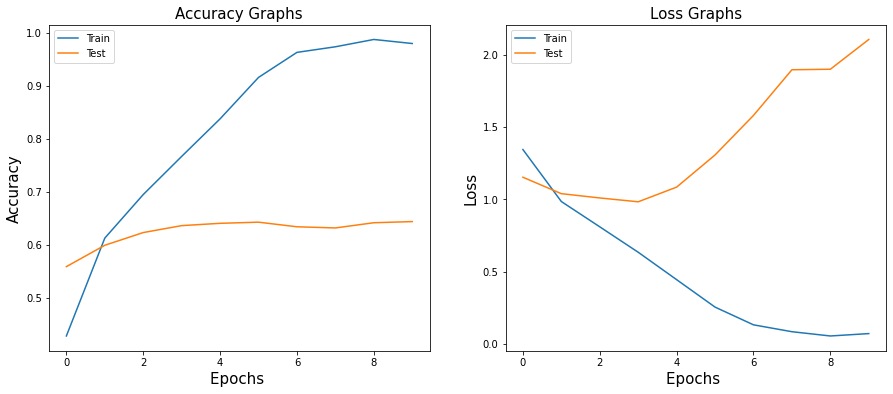

In [36]:
history_graph(cnn_history)

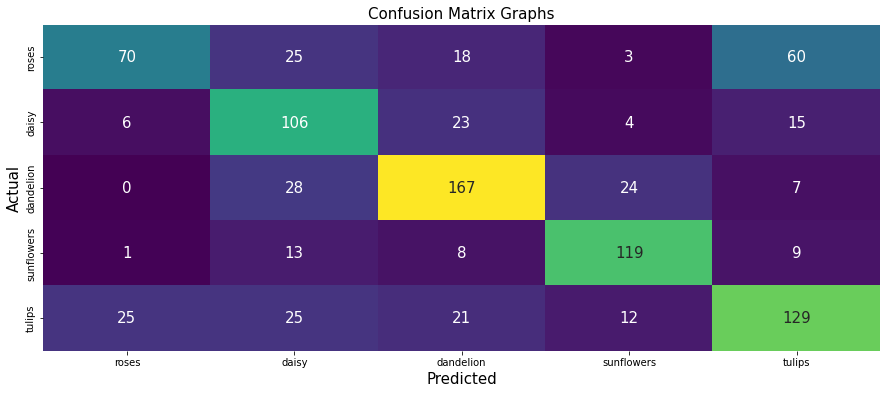

In [37]:
confusion_graph(y_test, soft_predict , classes=classes)

# Improve Test Accuracy Using Data Augmentation

In [38]:
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip,RandomRotation,RandomZoom

In [39]:
cnn_augmentation = Sequential()

cnn_augmentation.add( RandomFlip(mode = "horizontal") )
cnn_augmentation.add( RandomRotation(0.1))
cnn_augmentation.add( RandomZoom(0.1))

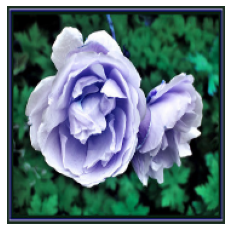

In [40]:
plt.axis("off")
plt.imshow(X[0])

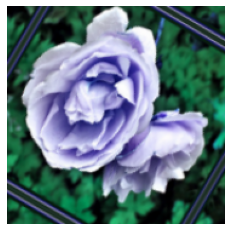

In [41]:
plt.axis("off")
plt.imshow(cnn_augmentation(X[0]).numpy().astype("uint8"))

In [42]:
cnn_augmentation = Sequential()

cnn_augmentation.add( RandomFlip(mode = "horizontal" ))
cnn_augmentation.add( RandomRotation(0.1))
cnn_augmentation.add( RandomZoom(0.1))

In [43]:
last_cnn = Sequential()

last_cnn.add(cnn_augmentation)

last_cnn.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "same", activation = "relu"))
last_cnn.add(MaxPool2D(pool_size=(2,2)))

last_cnn.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "same", activation = "relu"))
last_cnn.add(MaxPool2D(pool_size=(2,2)))

last_cnn.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
last_cnn.add(MaxPool2D(pool_size=(2,2)))
last_cnn.add(Dropout(0.2))

last_cnn.add(Flatten())
last_cnn.add(Dense(128, activation = "relu"))
last_cnn.add(Dense(num_classes))

last_cnn.compile(optimizer="adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ["accuracy"])

history_last_cnn = last_cnn.fit(X_train_scaled, y_train , epochs = 10, validation_data = (X_test_scaled, y_test) )

Epoch 1/10
86/86 [==============================] - 94s 1s/step - loss: 1.3030 - accuracy: 0.4379 - val_loss: 1.1349 - val_accuracy: 0.5479
Epoch 2/10
86/86 [==============================] - 92s 1s/step - loss: 1.0185 - accuracy: 0.6047 - val_loss: 1.0205 - val_accuracy: 0.5969
Epoch 3/10
86/86 [==============================] - 92s 1s/step - loss: 0.9244 - accuracy: 0.6315 - val_loss: 0.9409 - val_accuracy: 0.6340
Epoch 4/10
86/86 [==============================] - 94s 1s/step - loss: 0.8615 - accuracy: 0.6621 - val_loss: 0.8981 - val_accuracy: 0.6569
Epoch 5/10
86/86 [==============================] - 92s 1s/step - loss: 0.8195 - accuracy: 0.6770 - val_loss: 0.8803 - val_accuracy: 0.6678
Epoch 6/10
86/86 [==============================] - 92s 1s/step - loss: 0.7583 - accuracy: 0.7151 - val_loss: 0.8560 - val_accuracy: 0.6797
Epoch 7/10
86/86 [==============================] - 92s 1s/step - loss: 0.7300 - accuracy: 0.7148 - val_loss: 0.8313 - val_accuracy: 0.6885
Epoch 8/10
86/86 [==

In [44]:
last_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

In [45]:
# Farka Bak !!!
# Drop out + cnn_augmentation
# Sonuçlar farklılık gösterebilir !!!

last_cnn.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 7s 234ms/step - loss: 0.9064 - accuracy: 0.6667


[0.9064062833786011, 0.6666666865348816]

In [46]:
cnn.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 7s 234ms/step - loss: 2.1047 - accuracy: 0.6438


[2.1046597957611084, 0.6437908411026001]

In [47]:
last_predict = last_cnn.predict(X_test_scaled)
last_predict[:4]

array([[ 2.7881012 ,  7.6757092 , -0.03994917, -0.5843693 ,  2.2501676 ],
       [ 6.9746547 , -1.6880575 , -6.9358697 ,  1.0536323 ,  7.114487  ],
       [ 1.8488542 ,  0.34645048,  3.0545077 , -1.973404  ,  0.83437926],
       [ 1.6218953 ,  0.31336436, -1.7803886 ,  0.594299  ,  2.1634266 ]],
      dtype=float32)

In [48]:
# Soft Max Çalışma Mantığı

deneme = last_predict[1]
liste = []
for i in range(len(deneme)):

    result = deneme[i] / np.sum(deneme)

    liste.append(result)
liste

[1.0699215, -0.25895032, -1.0639719, 0.16162862, 1.091372]

In [49]:
np.argmax(liste)

4

In [50]:
last_score = tf.nn.softmax(last_predict)
last_soft_predict = [np.argmax(i) for i in last_score]
last_soft_predict[:4]

[1, 4, 2, 4]

In [51]:
y_test[:4]

array([1, 0, 2, 4])

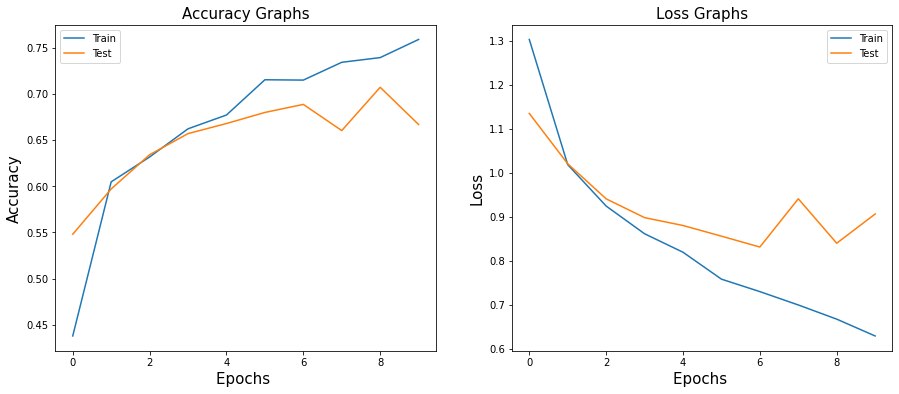

In [52]:
history_graph(history_last_cnn)

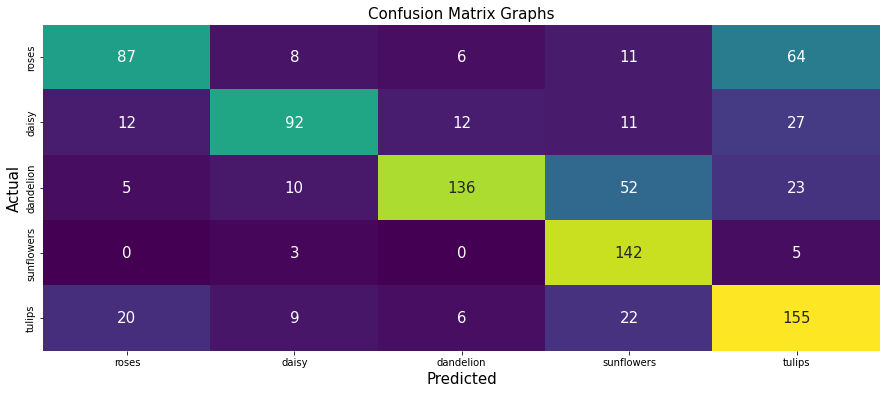

In [53]:
confusion_graph(y_test, last_soft_predict,  classes=classes)